Ejercicio 13B - GUÍA 1

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

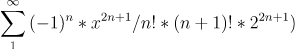

In [161]:
def n_term(x,n):
  return ( np.math.pow(-1,n)*np.math.pow(x,2*n+1) / ( (np.math.factorial(n)) * (np.math.factorial(n+1)) * (np.math.pow(2,2*n+1)) ))

In [162]:
x_sp = np.float32(10.1051)
x_dp = np.float64(10.1051)
error_esperado_sp = np.float32(1e-6)
error_esperado_dp = np.float64(1e-6)

In [163]:
def sumatoria(x, error_max, inicio, fin, perturbacion = 0):

  n = inicio
  x = x*(1-perturbacion)
  y = n_term(x,n)
  error_actual = n_term(x,n+1)
  
  while( (fin == None and np.absolute(error_actual) > error_max) or (error_max == None and n <= fin)):
    n +=1
    y += error_actual
    error_actual = n_term(x,n+1)

  return y,err,x,n

In [164]:
y,err,x,n = sumatoria(x_sp,error_esperado_sp,2,None)
print('\nY = ',y,' ---- Error de truncamiento = ',err,' ---- X = ',x)
print('\nTerminos sumados: ',n-2,' desde el termino n = 2 hasta n = ',n)


Y =  59.455969042751605  ---- Error de truncamiento =  1.3754895583974185e-07  ---- X =  10.10509967803955

Terminos sumados:  15  desde el termino n = 2 hasta n =  17


In [165]:
y,err,x,n = sumatoria(x_dp,error_esperado_dp,2,None)
print('\nY = ',y,' ---- Error de truncamiento = ',err,' ---- X = ',x)
print('\nTerminos sumados: ',n-2,' desde el termino n = 2 hasta n = ',n)


Y =  59.45597496533698  ---- Error de truncamiento =  1.3754895583974185e-07  ---- X =  10.1051

Terminos sumados:  15  desde el termino n = 2 hasta n =  17


Calculo del CP

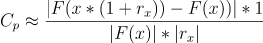


In [166]:
def calcularCP(x, inicio, fin, perturbacion):
  
  y,_,_,_ = sumatoria(x,None,inicio,fin)
  y_perturbado,_,_,_ = sumatoria(x,None,inicio,fin,perturbacion)
  cp = ((np.absolute(y_perturbado - y)) / np.absolute(y*perturbacion))
  return cp

In [167]:
exponentes = np.arange(-10,0)
perturbaciones_positivas = list(map(lambda e: np.math.pow(10,e),exponentes))
perturbaciones_negativas = list(map(lambda e: -np.math.pow(10,e),exponentes))
perturbaciones = perturbaciones_negativas + perturbaciones_positivas
print('Perturbaciones:',perturbaciones)

Perturbaciones: [-1e-10, -1e-09, -1e-08, -1e-07, -1e-06, -1e-05, -0.0001, -0.001, -0.01, -0.1, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]


In [168]:
xr = list(map(lambda r: x_sp*(1-r),perturbaciones))

In [169]:
cp = []
for p in perturbaciones:
  cp += [calcularCP(x_sp,2,17,p)]

In [170]:
df = pd.DataFrame({'x_valor':xr,'perturbacion':perturbaciones,'cp':cp})

In [171]:
df.head(5)

,x_valor,perturbacion,cp
0,10.105100,-1.000000e-10,3.126497
1,10.105100,-1.000000e-09,3.126467
2,10.105100,-1.000000e-08,3.126468
3,10.105101,-1.000000e-07,3.126468
4,10.105110,-1.000000e-06,3.126471


Hardcodeo el valor mínimo del cp

In [172]:
min_cp = df.cp.min()

In [173]:
df.shape

(20, 3)

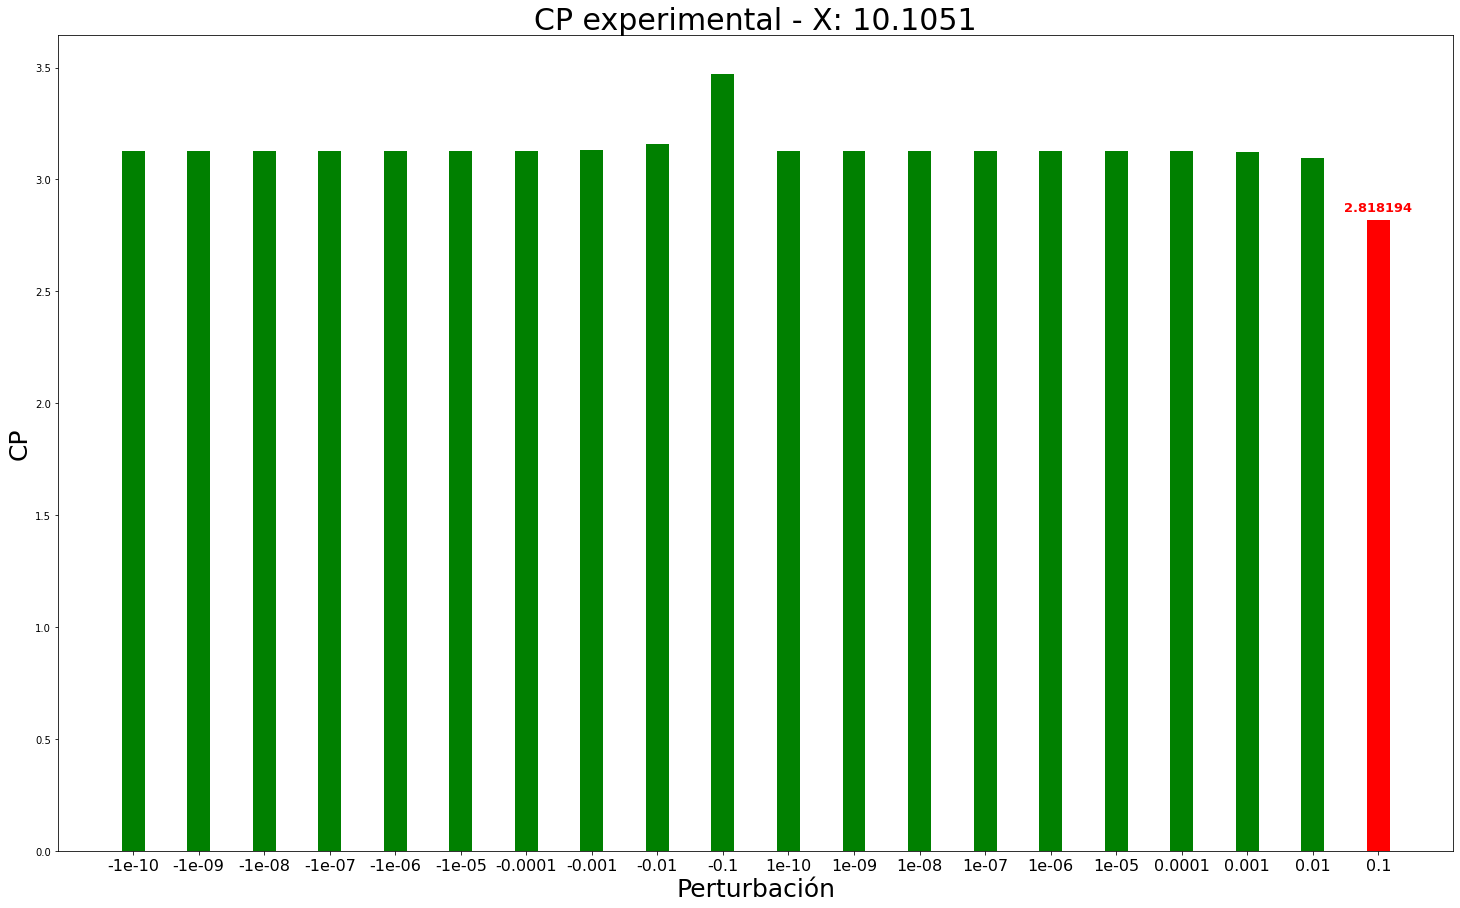

In [174]:
width = 0.35 
x_labels = np.arange(0,len(perturbaciones))

fig,ax = plt.subplots(figsize=(25,15));

bar_plot = ax.bar(x_labels,df.cp,width,color='g')

ax.set_ylabel('CP',fontdict=dict(fontsize=25))
ax.set_xlabel('Perturbación',fontdict=dict(fontsize=25))
ax.set_xticks(x_labels)
ax.set_xticklabels(map(lambda p: str(p),perturbaciones),fontdict=dict(fontsize=16))
ax.set_title('CP experimental - X: 10.1051',loc='center',fontdict=dict(fontsize=30))
for bar in bar_plot:
  height = bar.get_height() 
  c = 'k'
  if(height == min_cp):
    c='r'
    bar.set_facecolor(c)
    ax.text(bar.get_x() + bar.get_width()/2,height*1.01,'%f'%float(height),ha='center',va='bottom',fontdict=dict(fontsize=13,fontweight=900),color=c)


plt.show()
